# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

In [95]:
StudentID = [range(0,10)]
Age = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
Tardies = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

In [96]:
data = {"X": Age, "Y": Tardies}

In [97]:
student_data = pd.DataFrame(data)
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

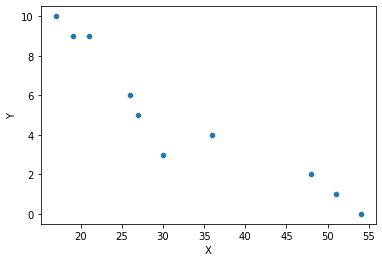

In [98]:
sd = sns.scatterplot(data=student_data, x = "X", y = "Y")
#X = AGE and Y = Tardies

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [99]:
# We can clearly see a negative correlation among our two inputs, Age and Tardies.
# There is a negative correlation in the graph as the amount of tardies decreases as the age increases
# We can assume a hypothesis where Age and Tardies are negatively correlated

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [100]:
#Covariance
def covariance(Age, Tardies):
    # Finding the mean of the series x and y
    mean_Age = sum(Age)/float(len(Age))
    mean_Tardies = sum(Tardies)/float(len(Tardies))
    # Subtracting mean from the individual elements
    sub_Age = [i - mean_Age for i in Age]
    sub_Tardies = [i - mean_Tardies for i in Tardies]
    numerator = sum([sub_Age[i]*sub_Tardies[i] for i in range(len(sub_Age))])
    denominator = len(Age)-1
    cov = numerator/denominator
    return cov

In [101]:
cov_func = covariance(Age, Tardies)
print(f"Covariance from the custom function: {cov_func}")

Covariance from the custom function: -45.56666666666667


In [102]:
#Correlation
student_data.corr()
# The Correlation here clearly shows the high negative correlation between both variables

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


In [182]:
print(np.cov(student_data['X'], student_data['Y']))
# Covariance gives the direction (positive or negative) between variables.
# Correlation gives this plus the strength of the correlation.

[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [169]:
student_data["prediction"] = -0.10 * student_data.X + 1
student_data["prediction_2"] = -0.12 * student_data.X + 10
student_data

,X,Y,prediction,prediction_2,eror,eror_2
0,17,10,-0.7,7.96,14.1,2.04
1,51,1,-4.1,3.88,15.3,2.88
2,27,5,-1.7,6.76,12.1,1.76
3,21,9,-1.1,7.48,14.3,1.52
4,36,4,-2.6,5.68,13.8,1.68
5,48,2,-3.8,4.24,15.4,2.24
6,19,9,-0.9,7.72,13.7,1.28
7,26,6,-1.6,6.88,12.8,0.88
8,54,0,-4.4,3.52,15.2,3.52
9,30,3,-2.0,6.40,11.0,3.40


In [170]:
student_data["eror"] = (student_data.Y - student_data["prediction"]).abs()
student_data["eror_2"] = (student_data.Y - student_data["prediction_2"]).abs()
student_data

,X,Y,prediction,prediction_2,eror,eror_2
0,17,10,-0.7,7.96,10.7,2.04
1,51,1,-4.1,3.88,5.1,2.88
2,27,5,-1.7,6.76,6.7,1.76
3,21,9,-1.1,7.48,10.1,1.52
4,36,4,-2.6,5.68,6.6,1.68
5,48,2,-3.8,4.24,5.8,2.24
6,19,9,-0.9,7.72,9.9,1.28
7,26,6,-1.6,6.88,7.6,0.88
8,54,0,-4.4,3.52,4.4,3.52
9,30,3,-2.0,6.40,5.0,3.40


In [171]:
student_data.eror.mean()

7.19

In [172]:
student_data.eror_2.mean()

2.1199999999999997

We can also use an already established Linear Regression Model 

In [183]:
lr = LinearRegression()
x = student_data[["X"]]
y = student_data.Y
lr.fit(x, y)

LinearRegression()

In [184]:
student_data["Tardies_sklearn"] = lr.predict(x)

Plot your regression model on your scatter plot.

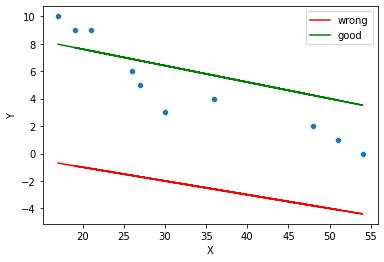

In [174]:
sns.scatterplot(x=student_data["X"], y=student_data["Y"])
plt.plot(student_data.X, student_data["prediction"], color='r', label='wrong')
plt.plot(student_data.X, student_data["prediction_2"], color='g', label='good')
plt.legend();

<AxesSubplot:xlabel='X', ylabel='Y'>

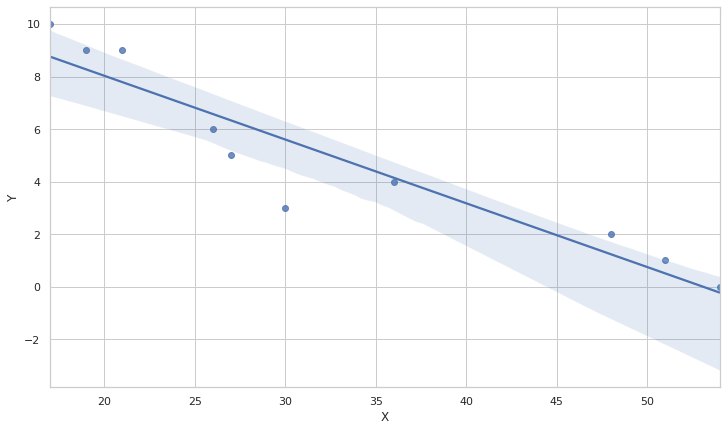

In [188]:
sns.set_context('poster')
sns.set(rc={'figure.figsize': (12, 7)})
sns.set_style('whitegrid')
sns.regplot(x="X", y="Y", data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In the previous Challenge, I developed a manual Linear Regression Model in which I plotted random means and standard deviations into two previously hinted predictions. I accentuated the difference amongst the two in order to better see the difference. Either way we can be assure that age is in fact a predictor of tardiness. The younger, the tardier.  

In [189]:
print("MAE: " , metrics.mean_absolute_error(student_data.X, student_data.Tardies_sklearn))
print("MSE: " , metrics.mean_squared_error(student_data.X, student_data.Tardies_sklearn))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(student_data.X, student_data.Tardies_sklearn)))

MAE:  28.0
MSE:  1044.8680798152643
RMSE:  32.32441924946625


MAE is the easiest to understand, because it is the mean error.
MSE is more popular than MAE, because MSE "penalises" larger errors, which is often useful in the real world.
RMSE is even more popular than MSE, it is the square root of the MSE and measures the standard deviation of the residuals.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [178]:
from sklearn import metrics

In [195]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("./vehicles.csv")
vehicles.rename(columns={"Fuel Barrels/Year": "Fuel_Barrels_per_Year",
          "Combined MPG": "Combined_MPG", "Fuel Cost/Year": "Fuel_Cost_per_Year",
                   "CO2 Emission Grams/Mile": "CO2_Emission_Grams_per_Mile"}, inplace = True)
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel_Barrels_per_Year,City MPG,Highway MPG,Combined_MPG,CO2_Emission_Grams_per_Mile,Fuel_Cost_per_Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [196]:
vehicles[vehicles.columns[1:]].corr()['CO2_Emission_Grams_per_Mile'][:]

Year                          -0.222300
Engine Displacement            0.803520
Cylinders                      0.752393
Fuel_Barrels_per_Year          0.986189
City MPG                      -0.894139
Highway MPG                   -0.926405
Combined_MPG                  -0.926229
CO2_Emission_Grams_per_Mile    1.000000
Fuel_Cost_per_Year             0.930865
Name: CO2_Emission_Grams_per_Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [197]:
results = smf.ols("CO2_Emission_Grams_per_Mile ~ Year + Cylinders + Fuel_Barrels_per_Year + Combined_MPG + Fuel_Cost_per_Year", data=vehicles).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.981
Model:                                     OLS   Adj. R-squared:                  0.981
Method:                          Least Squares   F-statistic:                 3.687e+05
Date:                         Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                                 20:06:15   Log-Likelihood:            -1.5173e+05
No. Observations:                        35952   AIC:                         3.035e+05
Df Residuals:                            35946   BIC:                         3.035e+05
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               769.8883     19.392     39.702      0.000     731.880     807.897
Year                     -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders                 1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels_per_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG             -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_per_Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

R2 : The coefficient of determination measures how much of the variance of 𝑦 is explained by the model. If the variance of the errors or residuals 𝜎2𝑒 is zero, the model explains 100% of the variable 𝑦. If 𝜎2𝑒 is equal to the variance of 𝑦 the model explains nothing and 𝑅2 is zero.

𝑅¯2 : The adjusted correlation coefficient 𝑅¯2 corrects the value of 𝑅2 by the number of variables 𝑘 (equal to 2 for the analysed case) and the amount of data 𝑁.

P value The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. ... Typically p-values are used to determine which terms should be kept in the regression model.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 